***IMPORTING LIBRARIES***

##IMPORTING PACKAGES

IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DATA PREPROCESSING

TRAINING IMAGE PREPROCESSING

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


VALIDATION IMAGE PREPROCESSING 

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

#BUILDING MODEL

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

## Building Convolution Layer

In [7]:
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [8]:
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=2, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=2, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.40))

In [16]:
#output layer
model.add(Dense(units=38,activation='softmax'))

##Compiling a model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4128      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        8256      
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                    

##Model training

In [19]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 1165s 530ms/step - loss: 1.1486 - accuracy: 0.6595 - val_loss: 0.4637 - val_accuracy: 0.8519
Epoch 2/10
2197/2197 [==============================] - 1103s 502ms/step - loss: 0.3736 - accuracy: 0.8816 - val_loss: 0.2133 - val_accuracy: 0.9310
Epoch 3/10
2197/2197 [==============================] - 1091s 496ms/step - loss: 0.2314 - accuracy: 0.9246 - val_loss: 0.2722 - val_accuracy: 0.9092
Epoch 4/10
2197/2197 [==============================] - 1103s 502ms/step - loss: 0.1613 - accuracy: 0.9465 - val_loss: 0.1479 - val_accuracy: 0.9528
Epoch 5/10
2197/2197 [==============================] - 1112s 506ms/step - loss: 0.1235 - accuracy: 0.9587 - val_loss: 0.1218 - val_accuracy: 0.9607
Epoch 6/10
2197/2197 [==============================] - 1109s 505ms/step - loss: 0.0991 - accuracy: 0.9667 - val_loss: 0.2103 - val_accuracy: 0.9335
Epoch 7/10
2197/2197 [==============================] - 1109s 505ms/step - loss: 0.0819 - accuracy: 0.9725

##MODEL EVALUATION

In [20]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 [==============================] - 285s 130ms/step - loss: 0.0180 - accuracy: 0.9936


In [21]:
print(train_loss,train_acc)

0.01797921024262905 0.9935984015464783


In [22]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 [==============================] - 71s 130ms/step - loss: 0.0943 - accuracy: 0.9723


In [23]:
print(val_loss,val_acc)

0.09426197409629822 0.9723423719406128


##Saving the model

In [24]:
model.save("trained_model.keras")

In [25]:
training_history.history

{'loss': [1.148614525794983,
  0.373636931180954,
  0.23137983679771423,
  0.16127993166446686,
  0.12348555028438568,
  0.09909187257289886,
  0.08190831542015076,
  0.06952644139528275,
  0.06145145371556282,
  0.050852011889219284],
 'accuracy': [0.6595205664634705,
  0.8816274404525757,
  0.9245750308036804,
  0.9465111494064331,
  0.9587168097496033,
  0.9667259454727173,
  0.9725015759468079,
  0.9767266511917114,
  0.9793441891670227,
  0.983341634273529],
 'val_loss': [0.4636850655078888,
  0.21334855258464813,
  0.2721860706806183,
  0.14792996644973755,
  0.12183510512113571,
  0.21025004982948303,
  0.13718032836914062,
  0.11411207169294357,
  0.09067654609680176,
  0.09426192194223404],
 'val_accuracy': [0.851866602897644,
  0.9309697151184082,
  0.9092305898666382,
  0.9528226852416992,
  0.9607329964637756,
  0.9335306286811829,
  0.9561233520507812,
  0.9656840562820435,
  0.9727407097816467,
  0.9723423719406128]}

##Recording history in json

In [26]:
import json
with open("training_hist.json","w") as f:
      json.dump(training_history.history,f)

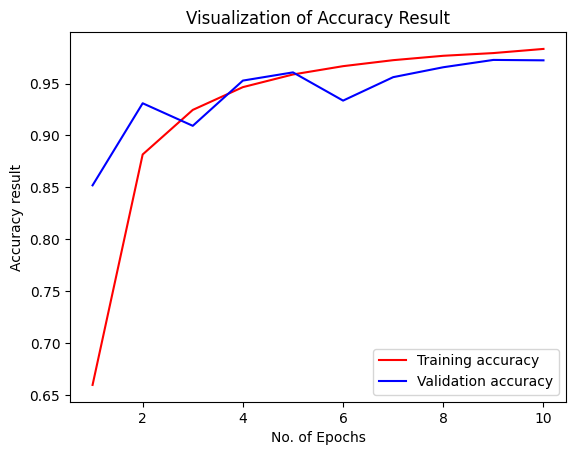

In [27]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [28]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [29]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred=model.predict(test_set)

550/550 [==============================] - 67s 121ms/step


In [31]:
y_pred,y_pred.shape

(array([[9.99999225e-01, 7.43681369e-07, 2.15115165e-12, ...,
         1.78007332e-17, 1.94300689e-16, 1.74490806e-13],
        [9.99999940e-01, 1.33881883e-08, 1.27647587e-10, ...,
         5.58537827e-18, 2.16356842e-15, 1.81003229e-13],
        [9.99999940e-01, 1.29267283e-11, 1.63680050e-13, ...,
         3.54207382e-24, 1.21226589e-19, 1.29409535e-16],
        ...,
        [1.82601378e-10, 1.13540760e-14, 9.25774180e-11, ...,
         3.48496666e-12, 1.25373518e-12, 1.00000000e+00],
        [1.11996246e-09, 3.69445034e-13, 2.74472077e-11, ...,
         1.11185255e-10, 6.50038530e-12, 9.99999404e-01],
        [5.39984000e-18, 1.15590485e-20, 1.56199410e-18, ...,
         4.09085584e-19, 3.82314928e-14, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [32]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
true_categories=tf.concat([y for x, y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [34]:
Y_true=tf.argmax(y_pred,axis=1)

In [35]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00       513
                                 Apple___Black_rot       1.00      1.00      1.00       500
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       463
                                   Apple___healthy       1.00      1.00      1.00       492
                               Blueberry___healthy       1.00      1.00      1.00       452
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       422
                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       459
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      1.00      1.00       442
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       472
               Corn_(maize)___Northern_Leaf_Blight       1.00      1.00      1.

In [38]:
cm=confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

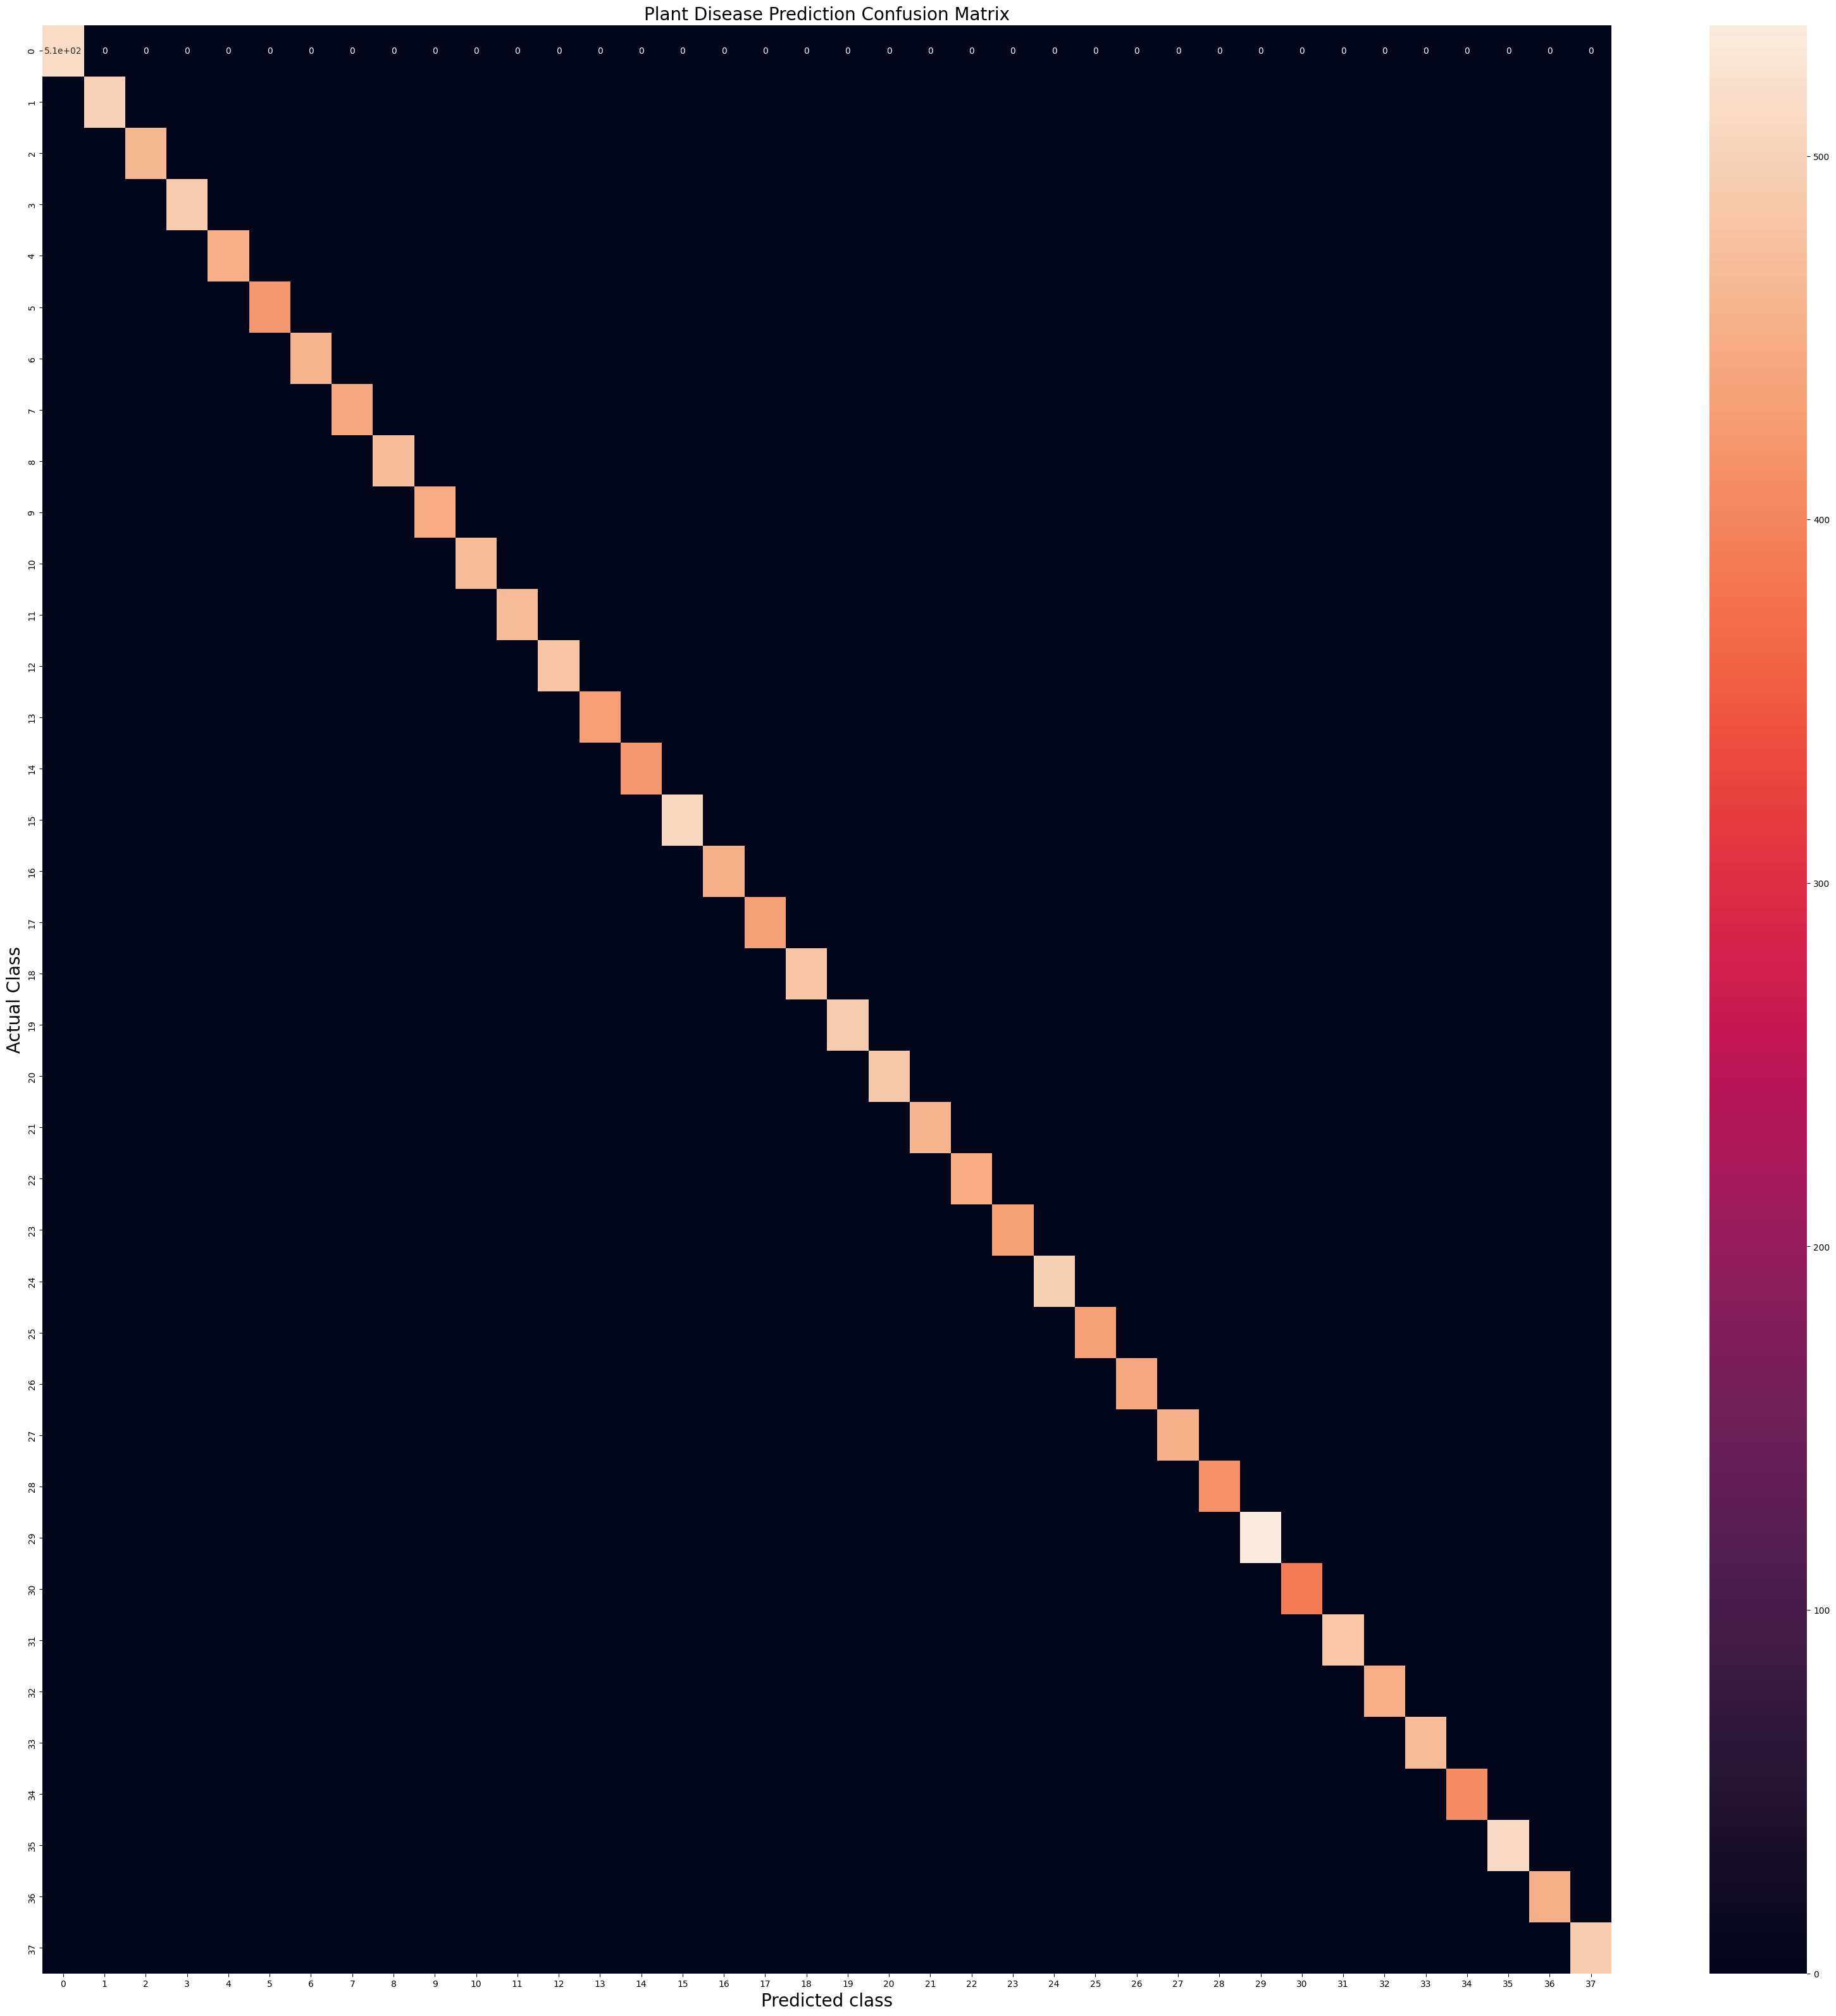

In [39]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=20)
plt.show()
